<a href="https://colab.research.google.com/github/ucbahallaou/w207_final_project/blob/main/dr16plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('drive/MyDrive/Datasets/ssds 16/Skyserver_12_15_2020 3 45 07 AM.csv',header=1)

In [2]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237678877245244171,318.951692,9.315146,19.51665,18.50036,17.95667,17.53139,17.32035,7777,301,5,53,819657923239110656,GALAXY,0.114299,728,52520,10
1,1237668332026986542,217.940001,14.608378,19.13548,18.55482,17.95603,17.68272,17.63717,5322,301,3,56,6154252554903769088,QSO,1.802680,5466,56033,304
2,1237664092899115053,129.948221,25.213328,19.54955,18.19434,17.83220,17.51329,17.47054,4335,301,3,130,2173034979993348096,GALAXY,0.070813,1930,53347,175
3,1237654604252119048,160.357788,3.567886,17.72343,16.65830,16.23667,16.07098,16.02797,2126,301,1,275,649647859372681216,STAR,0.000570,577,52367,13
4,1237661360769400880,226.001700,38.619699,16.60500,15.66234,15.39406,15.29443,15.29302,3699,301,2,227,5817649714997514240,STAR,-0.000184,5167,56066,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1237661069255639209,167.169668,13.963371,18.33024,17.41838,17.14917,17.03306,16.99625,3631,301,3,336,1972663829775017984,GALAXY,0.025480,1752,53379,317
499996,1237665565001187348,225.558331,18.500700,18.73732,17.22944,16.58573,16.36947,16.26186,4678,301,1,161,3143591231423014912,STAR,-0.000060,2792,54556,286
499997,1237659119323119750,215.473064,50.610086,19.57830,18.01280,17.32779,16.90973,16.66470,3177,301,3,71,1177785077195630592,GALAXY,0.077123,1046,52460,341
499998,1237659119336554740,248.658281,31.979162,18.01998,16.62829,15.93923,15.56417,15.33296,3177,301,3,276,1508818621768427520,GALAXY,0.085555,1340,52781,410


<Axes: >

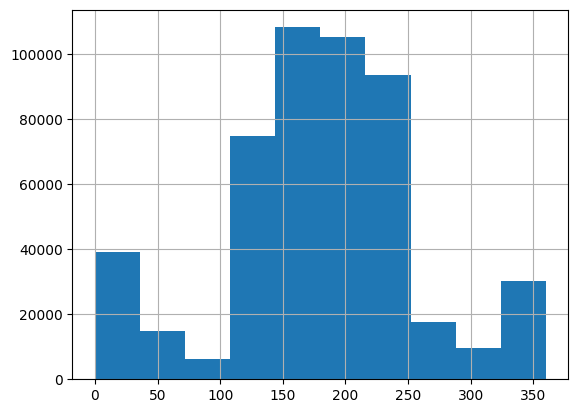

In [ ]:
df['ra'].hist()

<Axes: >

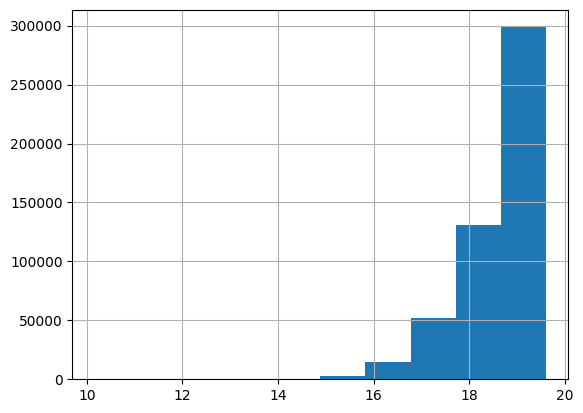

In [ ]:
df['u'].hist()

<Axes: >

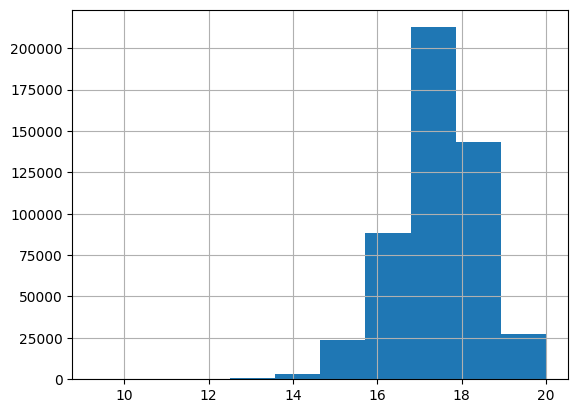

In [ ]:
df['g'].hist()

In [4]:
#no null vallues in any row
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [6]:
df['class'].value_counts()

GALAXY    252221
STAR      193243
QSO        54536
Name: class, dtype: int64

In [9]:
#remove unncessary columns
new_df = df.drop(columns=['objid','field','specobjid','plate','fiberid','run','rerun'])

In [ ]:
X = new_df.drop('class', axis=1)
y = new_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=58)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)



In [13]:
accuracy

0.99332